<body bgcolor = 'blue'></body>

<h1 align = 'center'><B><U>Lab</U> - <U>3</U> : <U>Concepts of Supervised Learning</U> - <U>Regression Algorithms</U>

<h3 align = 'center'><B><I>Waseem Iqbal Shaikh (8902834)</I><B></h3>

<h3 align = 'center'><B><U>PART</U> - <U>A</U></B></h3>

### Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importing the neccessary packages:

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

### Loading the dataset into a dataframe using Pandas:

In [472]:
ccData = pd.read_csv("creditcard.csv")
ccData.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Preprocessing:
- Checking for missing values:

In [473]:
missingValues = ccData.isnull().sum()
missingValues

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Checking for datatypes of the dataset:

In [474]:
dataTypes = ccData.dtypes
dataTypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

- Checking class distribution of dataset:

In [475]:
classDistribution = ccData['Class'].value_counts()
classDistribution

Class
0    284315
1       492
Name: count, dtype: int64

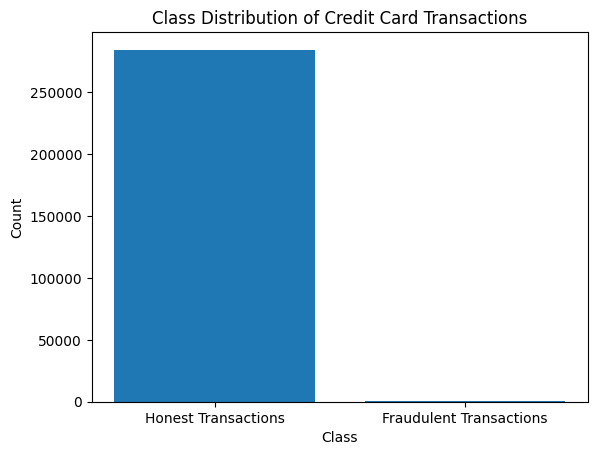

In [476]:
plt.bar(classDistribution.index, classDistribution.values)
plt.xticks([0, 1], ['Honest Transactions', 'Fraudulent Transactions'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Credit Card Transactions')
plt.show()

- Checking for the percentage of fradulent transactions in the dataset:

In [477]:
fradulentPercentage = (classDistribution[1]/len(ccData)) * 100
fradulentPercentage

0.1727485630620034

- Seperating the dependent('Class') and independent data from the dataset:

In [478]:
X = ccData.drop('Class', axis=1)
y = ccData['Class']

- Splitting the data in training and testing dataset:

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)


### Training a model using Logistic Regression:

In [480]:
logreg = LogisticRegression(random_state=34, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=34)

### Making prediction using the model:

In [481]:
y_pred = logreg.predict(X_test)

### Evaluating the model:

In [482]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy of the model:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy of the model: 0.9990871107053826
Confusion Matrix:
[[85268    17]
 [   61    97]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.85      0.61      0.71       158

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



### After evaluating the model we can conclude: 
- The model detects credit card fraud with a high accuracy of almost 99.91%, showing great overall performance.

- However, there is a problem with class imbalance because the model has a low recall of about 61% for detecting fraudulent transactions.

- The model has 100% accuracy for non-fraudulent transactions, which reduces false positives.

- Techniques like applying various algorithms, altering class weights, or using sophisticated sampling methods can be taken into consideration to improve performance for the minority class (fraudulent transactions).

<h3 align = 'center'><B><U>PART</U> - <U>B</U></B></h3>

### Problem Statement: Use the following insuranceData dataset and build a predictive system to predict insuranceData costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insuranceData cost. https://www.kaggle.com/datasets/mirichoi0218/insuranceData

### Loading the dataset in dataframe:

In [483]:
insuranceData = pd.read_csv("insurance.csv")
insuranceData.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing:

- Finding missing values in dataset:

In [484]:
missingValues = insuranceData.isnull().sum()
missingValues

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- Checking datatypes of the dataset:

In [485]:
dataTypes = insuranceData.dtypes
dataTypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

- Converting the categorical variables to numerical variables:

In [486]:
sexMapping = {'male': 0, 'female': 1}
smokerMapping = {'no': 0, 'yes': 1}
regionMapping = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
insuranceData['sex'] = insuranceData['sex'].replace(sexMapping)
insuranceData['smoker'] = insuranceData['smoker'].replace(smokerMapping)
insuranceData['region'] = insuranceData['region'].replace(regionMapping)
insuranceData.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


### Splitting the dataset in training and testing data:

In [487]:
X = insuranceData.drop('charges', axis=1)
y = insuranceData['charges']

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

### Training the model using Linear Regression:

In [489]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [491]:
y_pred = model.predict(X_test)

### Evaluating the model:


In [495]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)
print("The Mean Square Error of the model is", MSE)
print("The Root Mean Square Error of the model is", RMSE)
print("The Mean Absolute Error of the model is", MAE)
print("The R-Squared Score of the model is", R2Score)

The Mean Square Error of the model is 36079323.82704734
The Root Mean Square Error of the model is 6006.6066815671675
The Mean Absolute Error of the model is 4130.452820028221
The R-Squared Score of the model is 0.7441708895909325


### The model's predictions have relatively large errors (high MSE, RMSE, and MAE), indicating room for improvement. However, the model shows some correlation with the true values (R-squared score of approximately 0.744). Further analysis and refinement are needed to enhance the model's performance, which may involve feature selection, data exploration, and experimenting with different algorithms and parameters.